In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
import os
hep.style.use("CMS")
hep.style.use(hep.style.CMS)

In [2]:
unfolded_RGE_carbon_file_name = "/home/ryan/clas_analysis/clas12-rge-analysis/analysis/unfolded_carbon_absolute_cross_sections_pass09_withyadism.csv"
unfolded_RGE_carbon_df = pd.read_csv(unfolded_RGE_carbon_file_name)

# Renaming x_bin_center and Q2_bin_center to x and Q2, respectively
unfolded_RGE_carbon_df = unfolded_RGE_carbon_df.rename(columns={
    "x_bin_center":"x",
    "Q2_bin_center":"Q2",
})

In [3]:
unfolded_RGE_deuterium_file_name = "/home/ryan/clas_analysis/clas12-rge-analysis/analysis/unfolded_deuterium_absolute_cross_sections_pass09_withyadism.csv"
unfolded_RGE_deuterium_df = pd.read_csv(unfolded_RGE_deuterium_file_name)

# Renaming x_bin_center and Q2_bin_center to x and Q2, respectively
unfolded_RGE_deuterium_df = unfolded_RGE_deuterium_df.rename(columns={
    "x_bin_center":"x",
    "Q2_bin_center":"Q2",
})

In [4]:
reco_RGE_carbon_file_name = "/home/ryan/clas_analysis/clas12-rge-analysis/analysis/reco_carbon_absolute_cross_sections_pass09_withyadism.csv"
reco_RGE_carbon_df = pd.read_csv(reco_RGE_carbon_file_name)

# Renaming x_bin_center and Q2_bin_center to x and Q2, respectively
reco_RGE_deuterium_df = reco_RGE_carbon_df.rename(columns={
    "x_bin_center":"x",
    "Q2_bin_center":"Q2",
})

In [5]:
reco_RGE_deuterium_file_name = "/home/ryan/clas_analysis/clas12-rge-analysis/analysis/reco_deuterium_absolute_cross_sections_pass09_withyadism.csv"
reco_RGE_deuterium_df = pd.read_csv(reco_RGE_deuterium_file_name)

# Renaming x_bin_center and Q2_bin_center to x and Q2, respectively
reco_RGE_deuterium_df = reco_RGE_deuterium_df.rename(columns={
    "x_bin_center":"x",
    "Q2_bin_center":"Q2",
})

In [6]:
all_Q2_bin_centers = np.unique(unfolded_RGE_carbon_df["Q2"])

Text(0.5, 0.9, 'RGE 20131-20176 pass 0.9: Carbon unfolded')

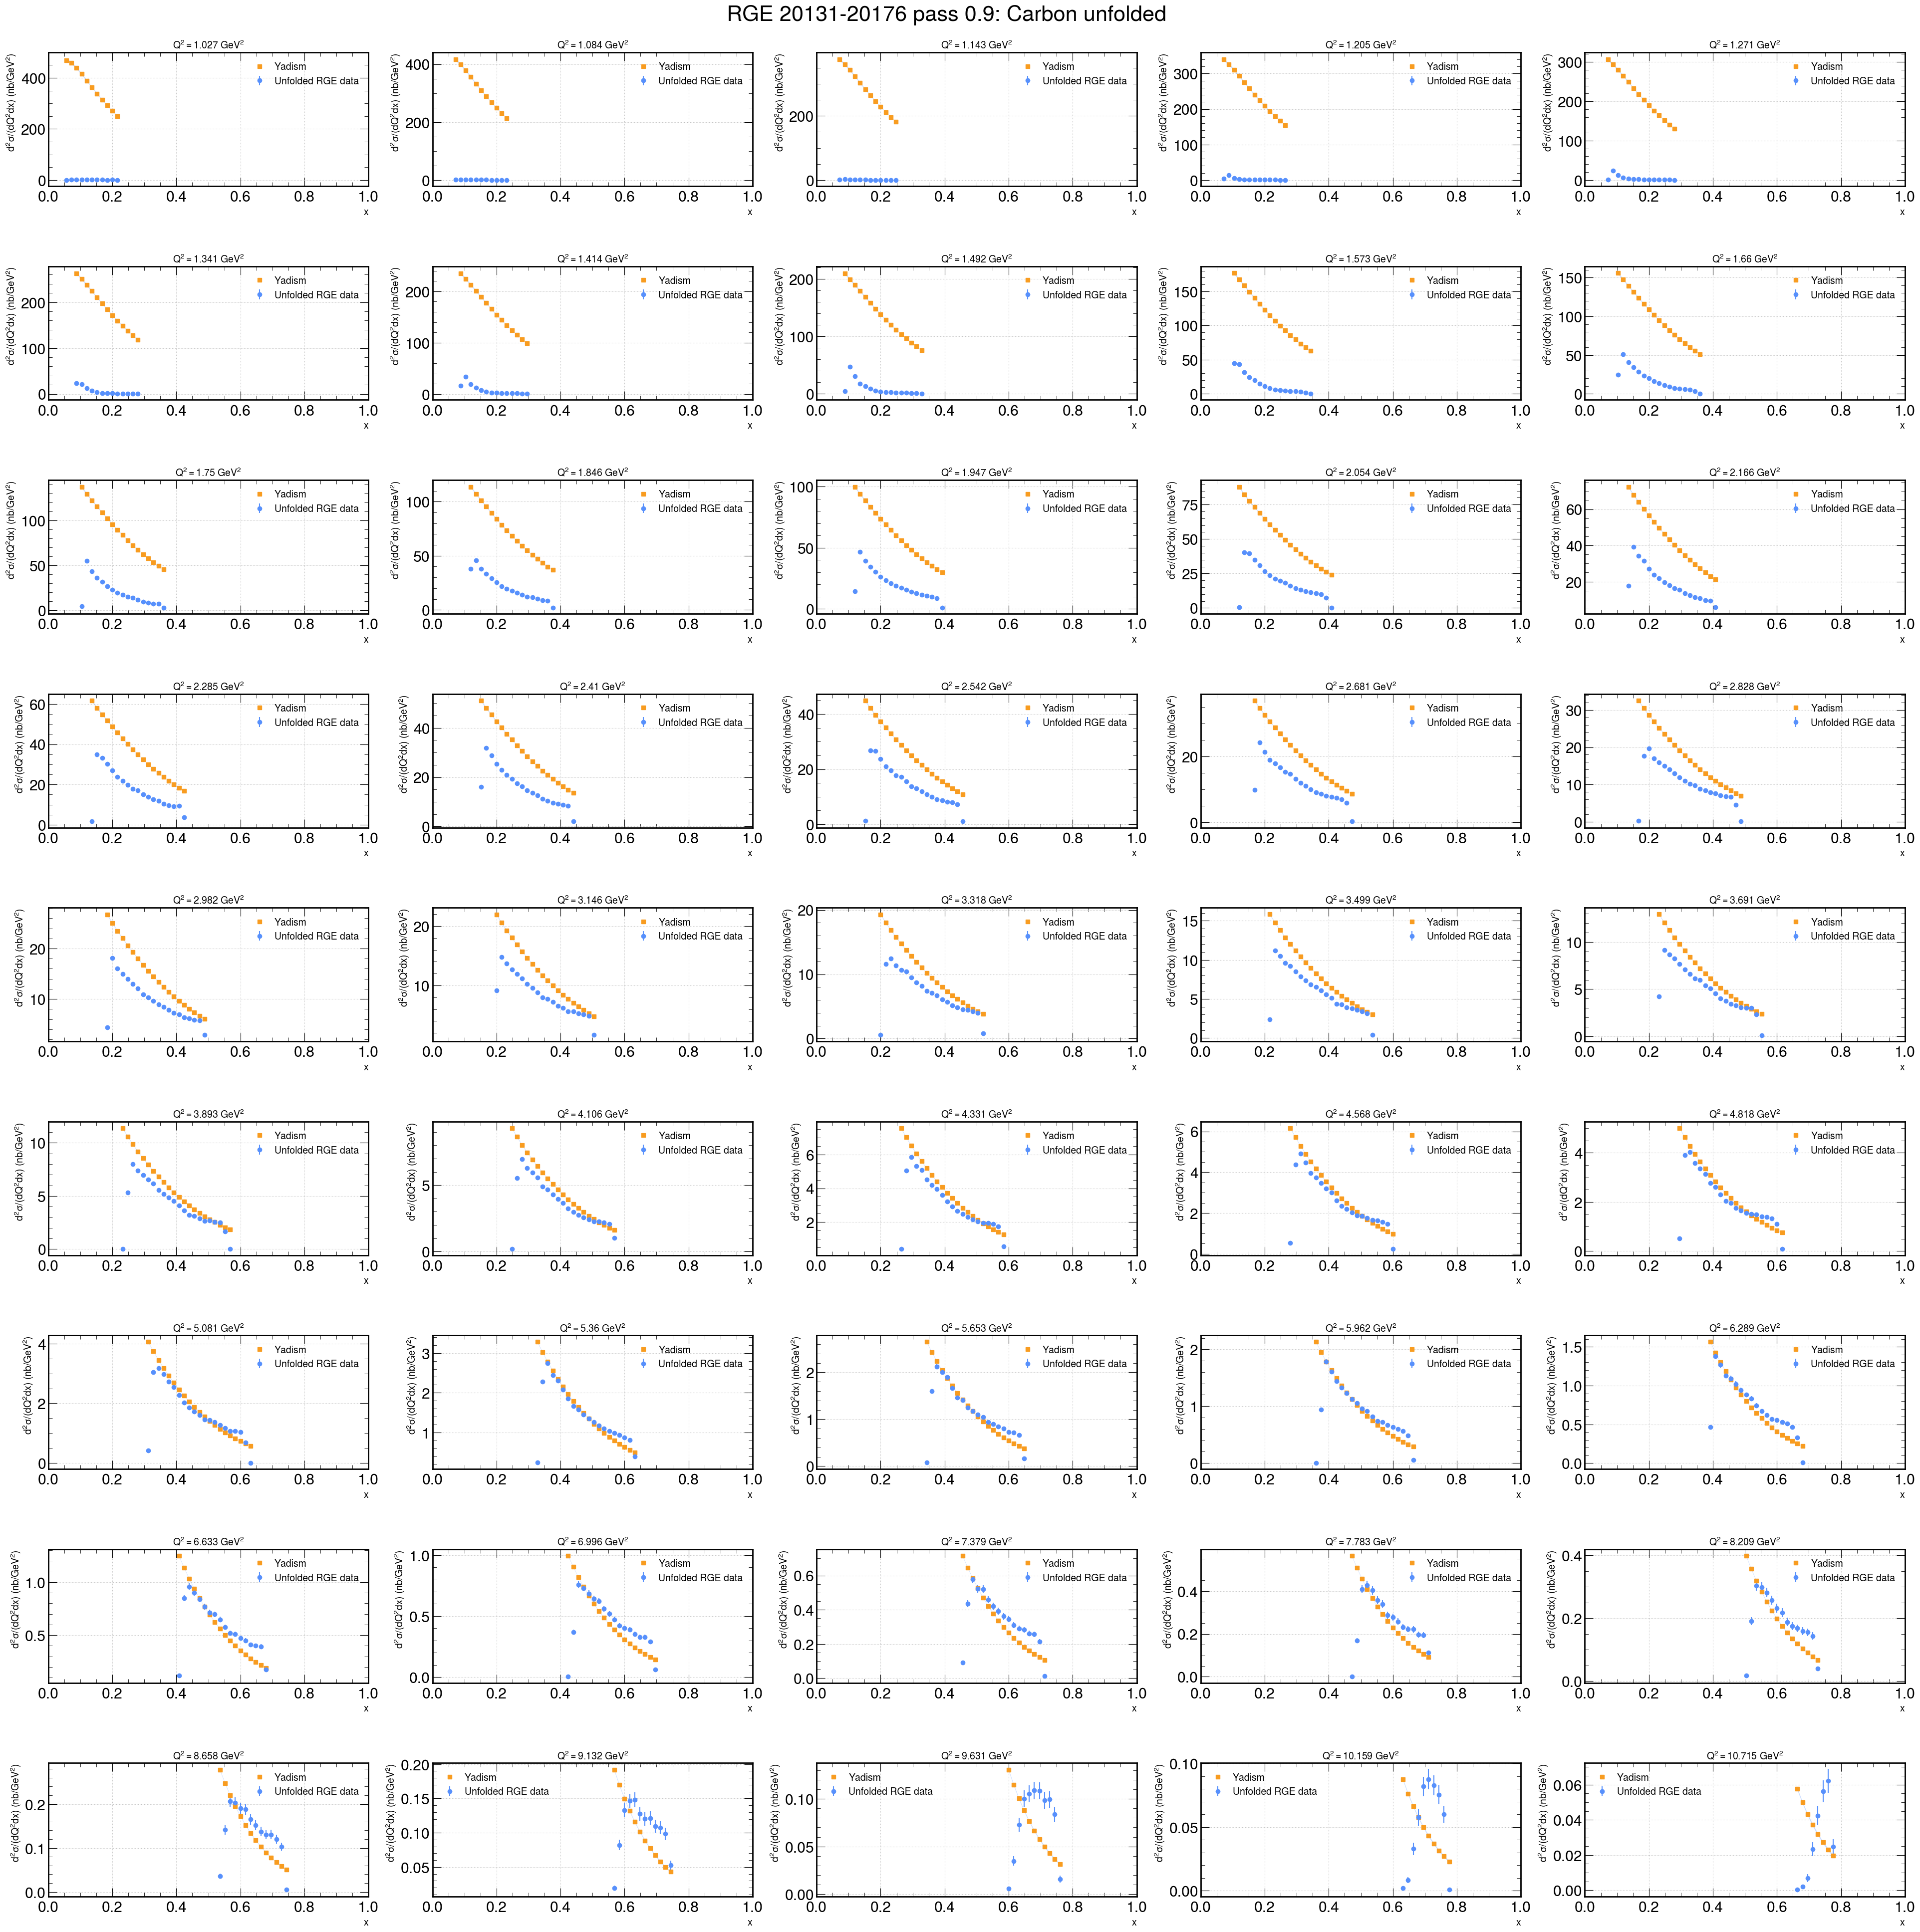

In [7]:
fig, axs = plt.subplots(figsize = (48,48), ncols = 5, nrows=9)
fig.subplots_adjust(hspace=0.6)
axs = axs.flatten()
for i, Q2_bin_center in enumerate(all_Q2_bin_centers):
    df_in_bin = unfolded_RGE_carbon_df.query("Q2 == @Q2_bin_center")
    x_values = df_in_bin["x"]
    absolute_cross_section, absolute_cross_section_errors = df_in_bin["absolute_cross_sections"], df_in_bin["absolute_cross_sections_errors"]
    yadism_cross_section, yadism_cross_section_errors = df_in_bin["sigma_yadism_pb_per_GeV2"], df_in_bin["sigma_yadism_pdf_err68"]
    axs[i].errorbar(x_values, absolute_cross_section/1000, yerr = absolute_cross_section_errors/1000, label="Unfolded RGE data", fmt="o")
    
    axs[i].plot(
        x_values,
        yadism_cross_section /1000,
        "s",
        label="Yadism"
    )
    axs[i].fill_between(
        x_values,
        (yadism_cross_section - yadism_cross_section_errors) / 1000,
        (yadism_cross_section + yadism_cross_section_errors) / 1000,
        alpha=0.3
    )

    axs[i].set_xlim(0,1)
    axs[i].set_title(f"$Q^2 = {round(Q2_bin_center, 3)} ~GeV^2$", fontsize=14)
    axs[i].set_xlabel("x", fontsize=14)
    axs[i].set_ylabel("$d^2 \\sigma / (dQ^2 dx)~ (nb/GeV^2)$", fontsize=14)
    axs[i].legend(fontsize=14)
    axs[i].grid()
plt.suptitle("RGE 20131-20176 pass 0.9: Carbon unfolded", y=.9)

Text(0.5, 0.9, 'RGE 20131-20176 pass 0.9: Carbon Reconstructed')

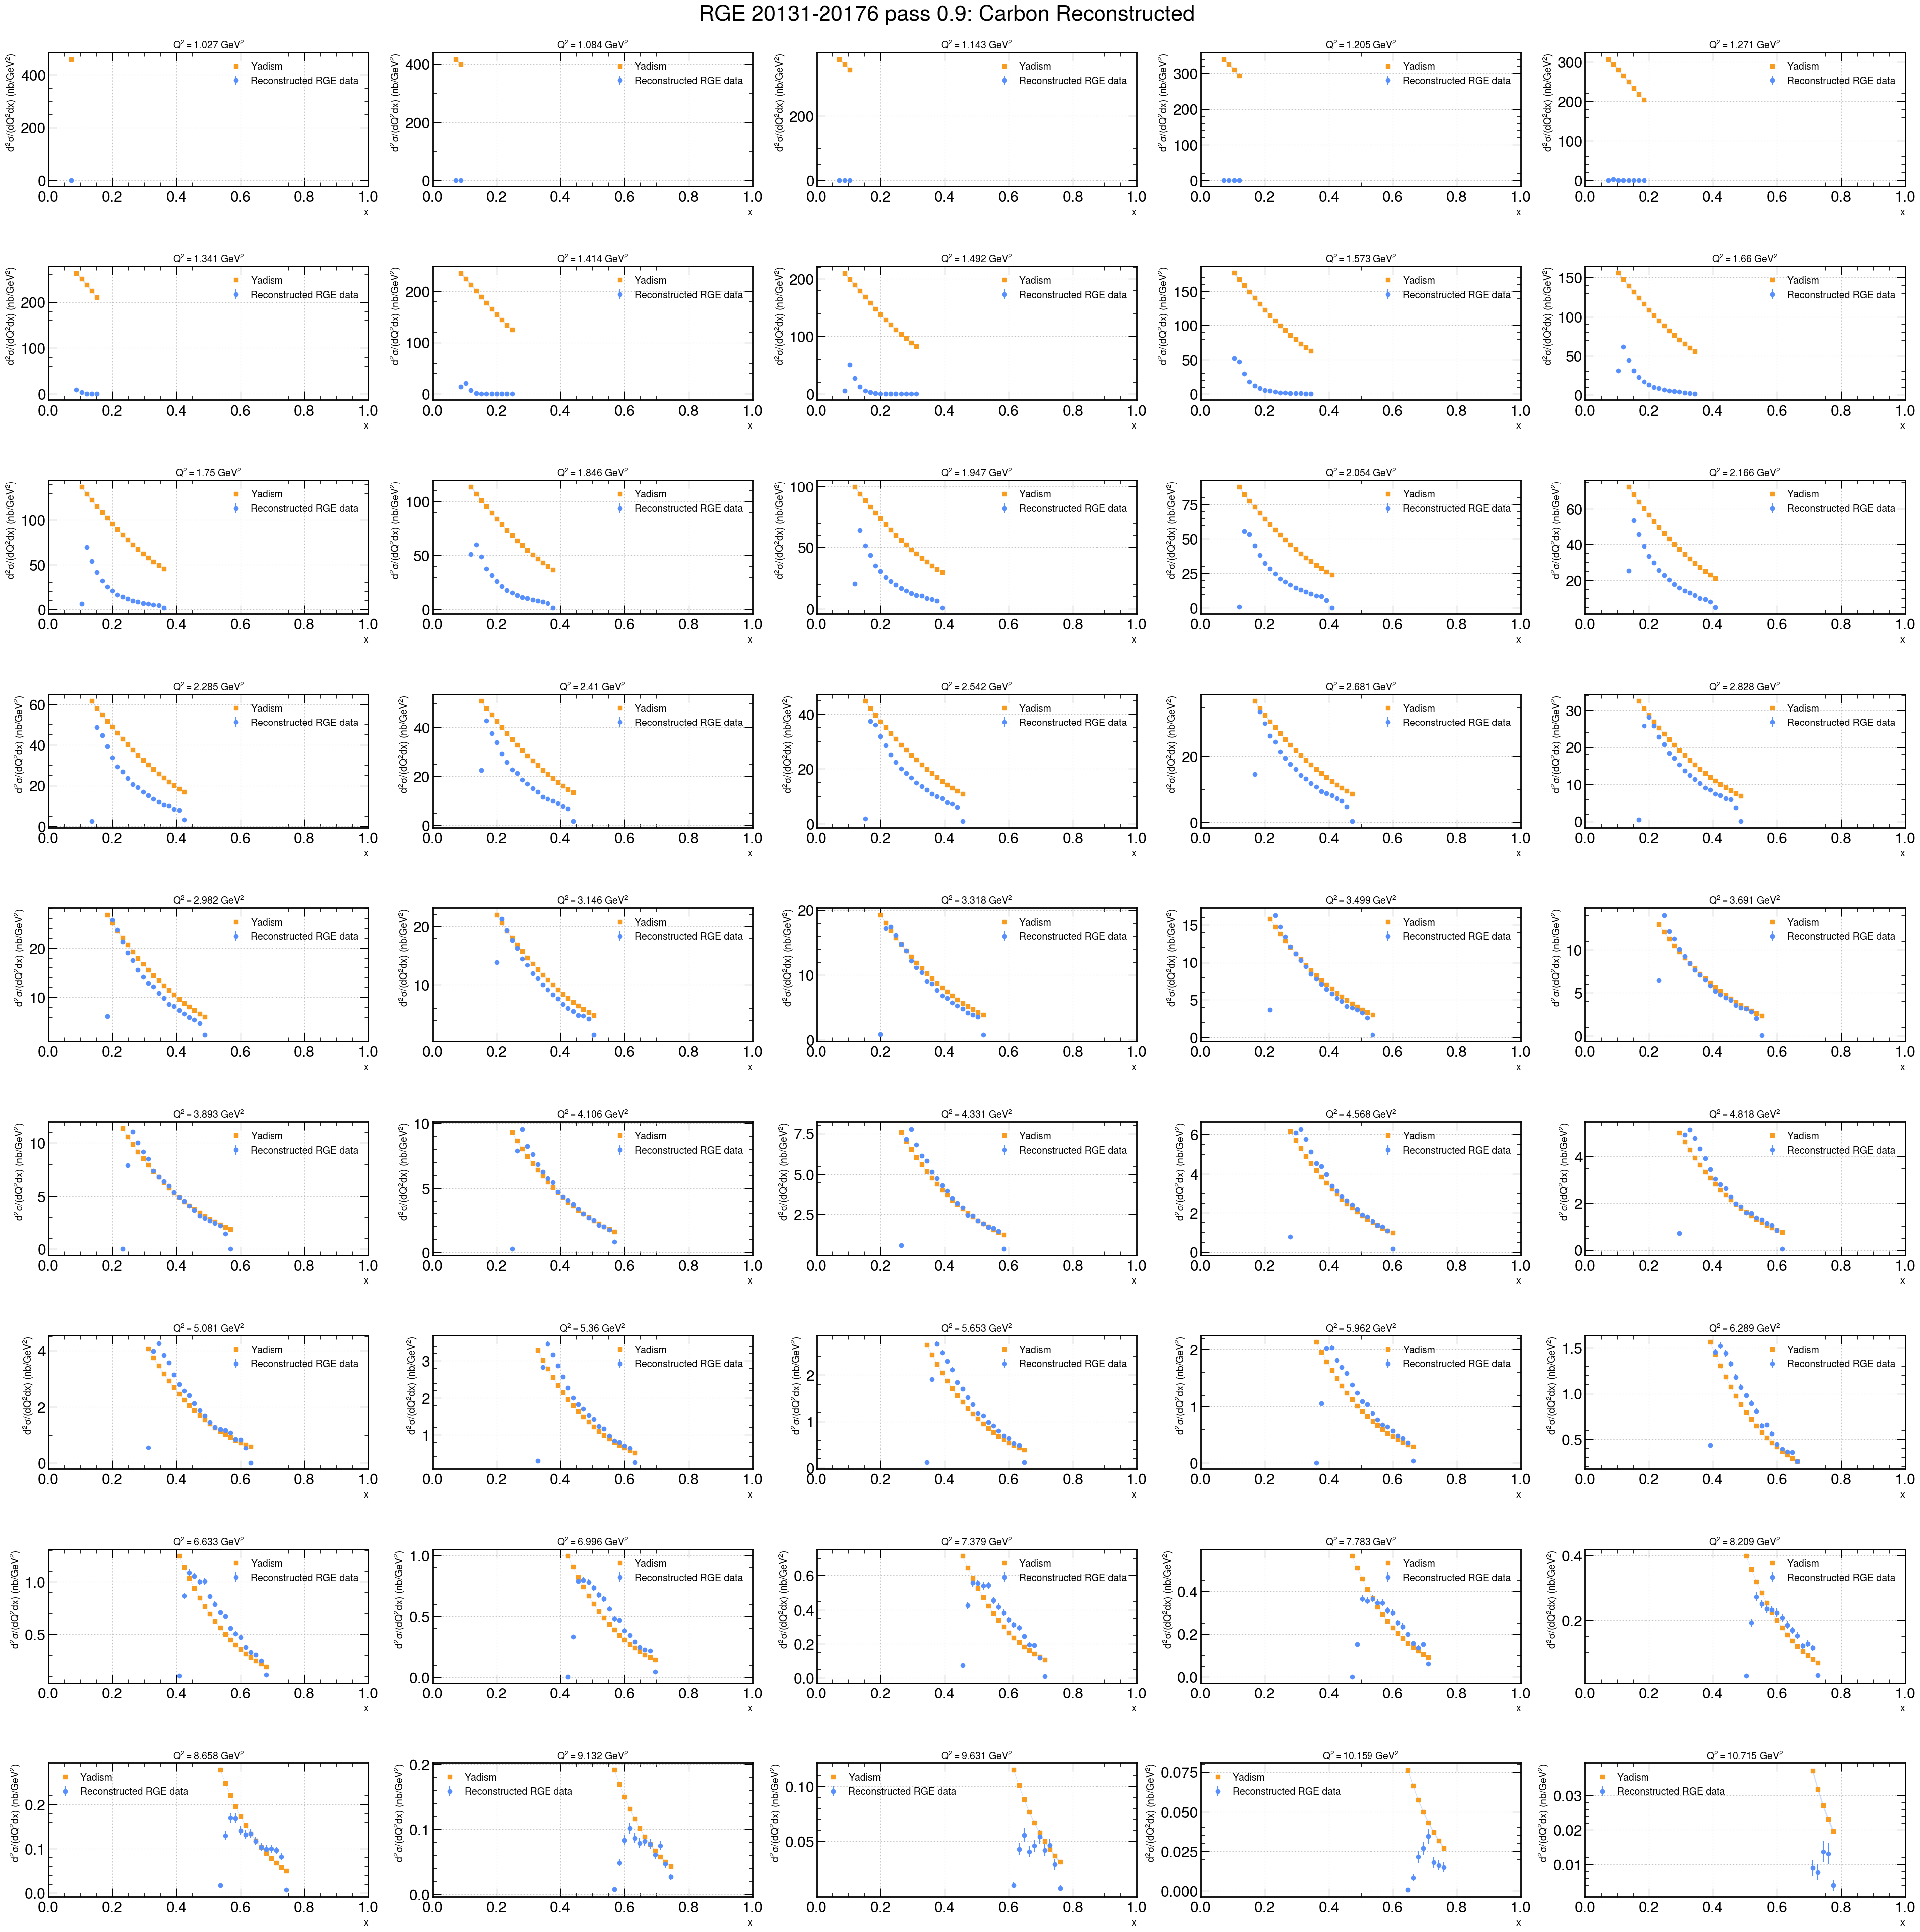

In [8]:
fig, axs = plt.subplots(figsize = (48,48), ncols = 5, nrows=9)
fig.subplots_adjust(hspace=0.6)
axs = axs.flatten()
for i, Q2_bin_center in enumerate(all_Q2_bin_centers):
    df_in_bin = reco_RGE_carbon_df.query("Q2 == @Q2_bin_center")
    x_values = df_in_bin["x"]
    absolute_cross_section, absolute_cross_section_errors = df_in_bin["absolute_cross_sections"], df_in_bin["absolute_cross_sections_errors"]
    yadism_cross_section, yadism_cross_section_errors = df_in_bin["sigma_yadism_pb_per_GeV2"], df_in_bin["sigma_yadism_pdf_err68"]
    axs[i].errorbar(x_values, absolute_cross_section/1000, yerr = absolute_cross_section_errors/1000, label="Reconstructed RGE data", fmt="o")
    axs[i].plot(
        x_values,
        yadism_cross_section / 1000,
        "s",
        label="Yadism"
    )
    axs[i].fill_between(
        x_values,
        (yadism_cross_section - yadism_cross_section_errors) / 1000,
        (yadism_cross_section + yadism_cross_section_errors) / 1000,
        alpha=0.3
    )
    axs[i].set_xlim(0,1)
    axs[i].set_title(f"$Q^2 = {round(Q2_bin_center, 3)} ~GeV^2$", fontsize=14)
    axs[i].set_xlabel("x", fontsize=14)
    axs[i].set_ylabel("$d^2 \\sigma / (dQ^2 dx)~ (nb/GeV^2)$", fontsize=14)
    axs[i].legend(fontsize=14)
    axs[i].grid()
plt.suptitle("RGE 20131-20176 pass 0.9: Carbon Reconstructed", y=.9)

Text(0.5, 0.9, 'RGE 20131-20176 pass 0.9: LD2 unfolded')

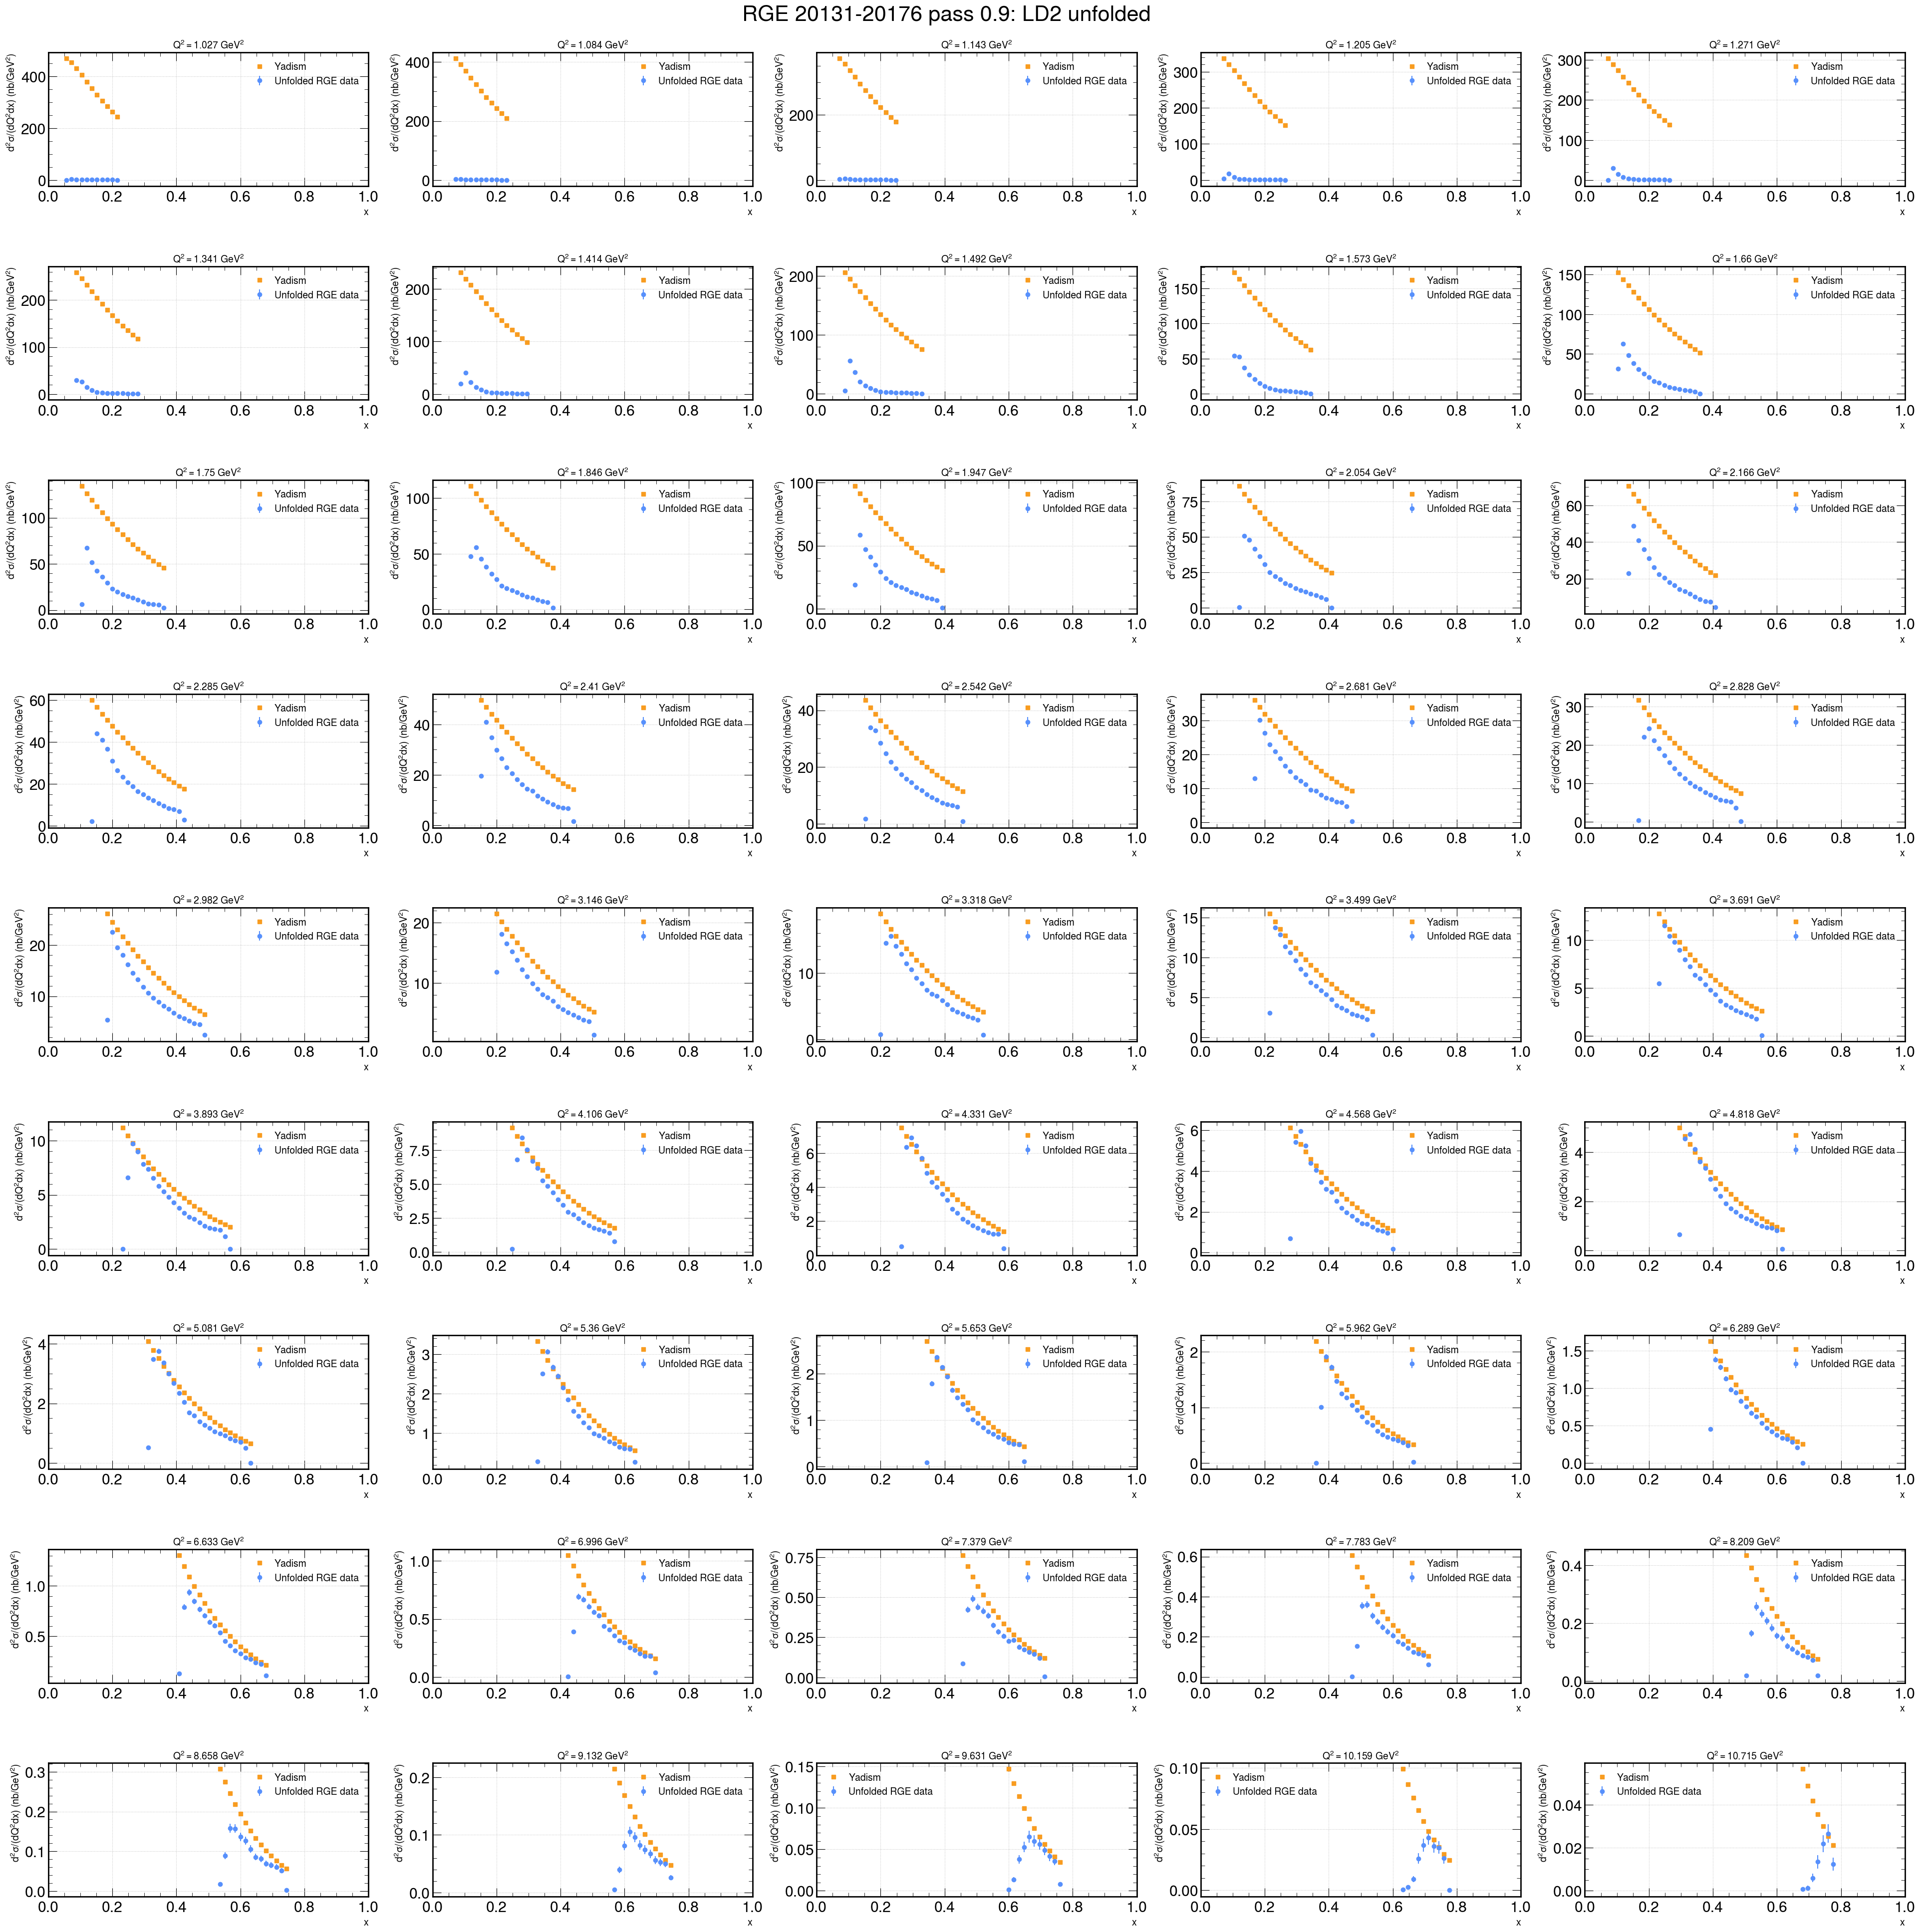

In [9]:
fig, axs = plt.subplots(figsize = (48,48), ncols = 5, nrows=9)
fig.subplots_adjust(hspace=0.6)
axs = axs.flatten()
for i, Q2_bin_center in enumerate(all_Q2_bin_centers):
    df_in_bin = unfolded_RGE_deuterium_df.query("Q2 == @Q2_bin_center")
    x_values = df_in_bin["x"]
    absolute_cross_section, absolute_cross_section_errors = df_in_bin["absolute_cross_sections"], df_in_bin["absolute_cross_sections_errors"]
    yadism_cross_section, yadism_cross_section_errors = df_in_bin["sigma_yadism_pb_per_GeV2"], df_in_bin["sigma_yadism_pdf_err68"]
    axs[i].errorbar(x_values, absolute_cross_section/1000, yerr = absolute_cross_section_errors/1000, label="Unfolded RGE data", fmt="o")
    
    axs[i].plot(
        x_values,
        yadism_cross_section / 1000,
        "s",
        label="Yadism"
    )
    axs[i].fill_between(
        x_values,
        (yadism_cross_section - yadism_cross_section_errors) / 1000,
        (yadism_cross_section + yadism_cross_section_errors) / 1000,
        alpha=0.3
    )

    axs[i].set_xlim(0,1)
    axs[i].set_title(f"$Q^2 = {round(Q2_bin_center, 3)} ~GeV^2$", fontsize=14)
    axs[i].set_xlabel("x", fontsize=14)
    axs[i].set_ylabel("$d^2 \\sigma / (dQ^2 dx)~ (nb/GeV^2)$", fontsize=14)
    axs[i].legend(fontsize=14)
    axs[i].grid()
plt.suptitle("RGE 20131-20176 pass 0.9: LD2 unfolded", y=.9)

Text(0.5, 0.9, 'RGE 20131-20176 pass 0.9: LD2 Reconstructed')

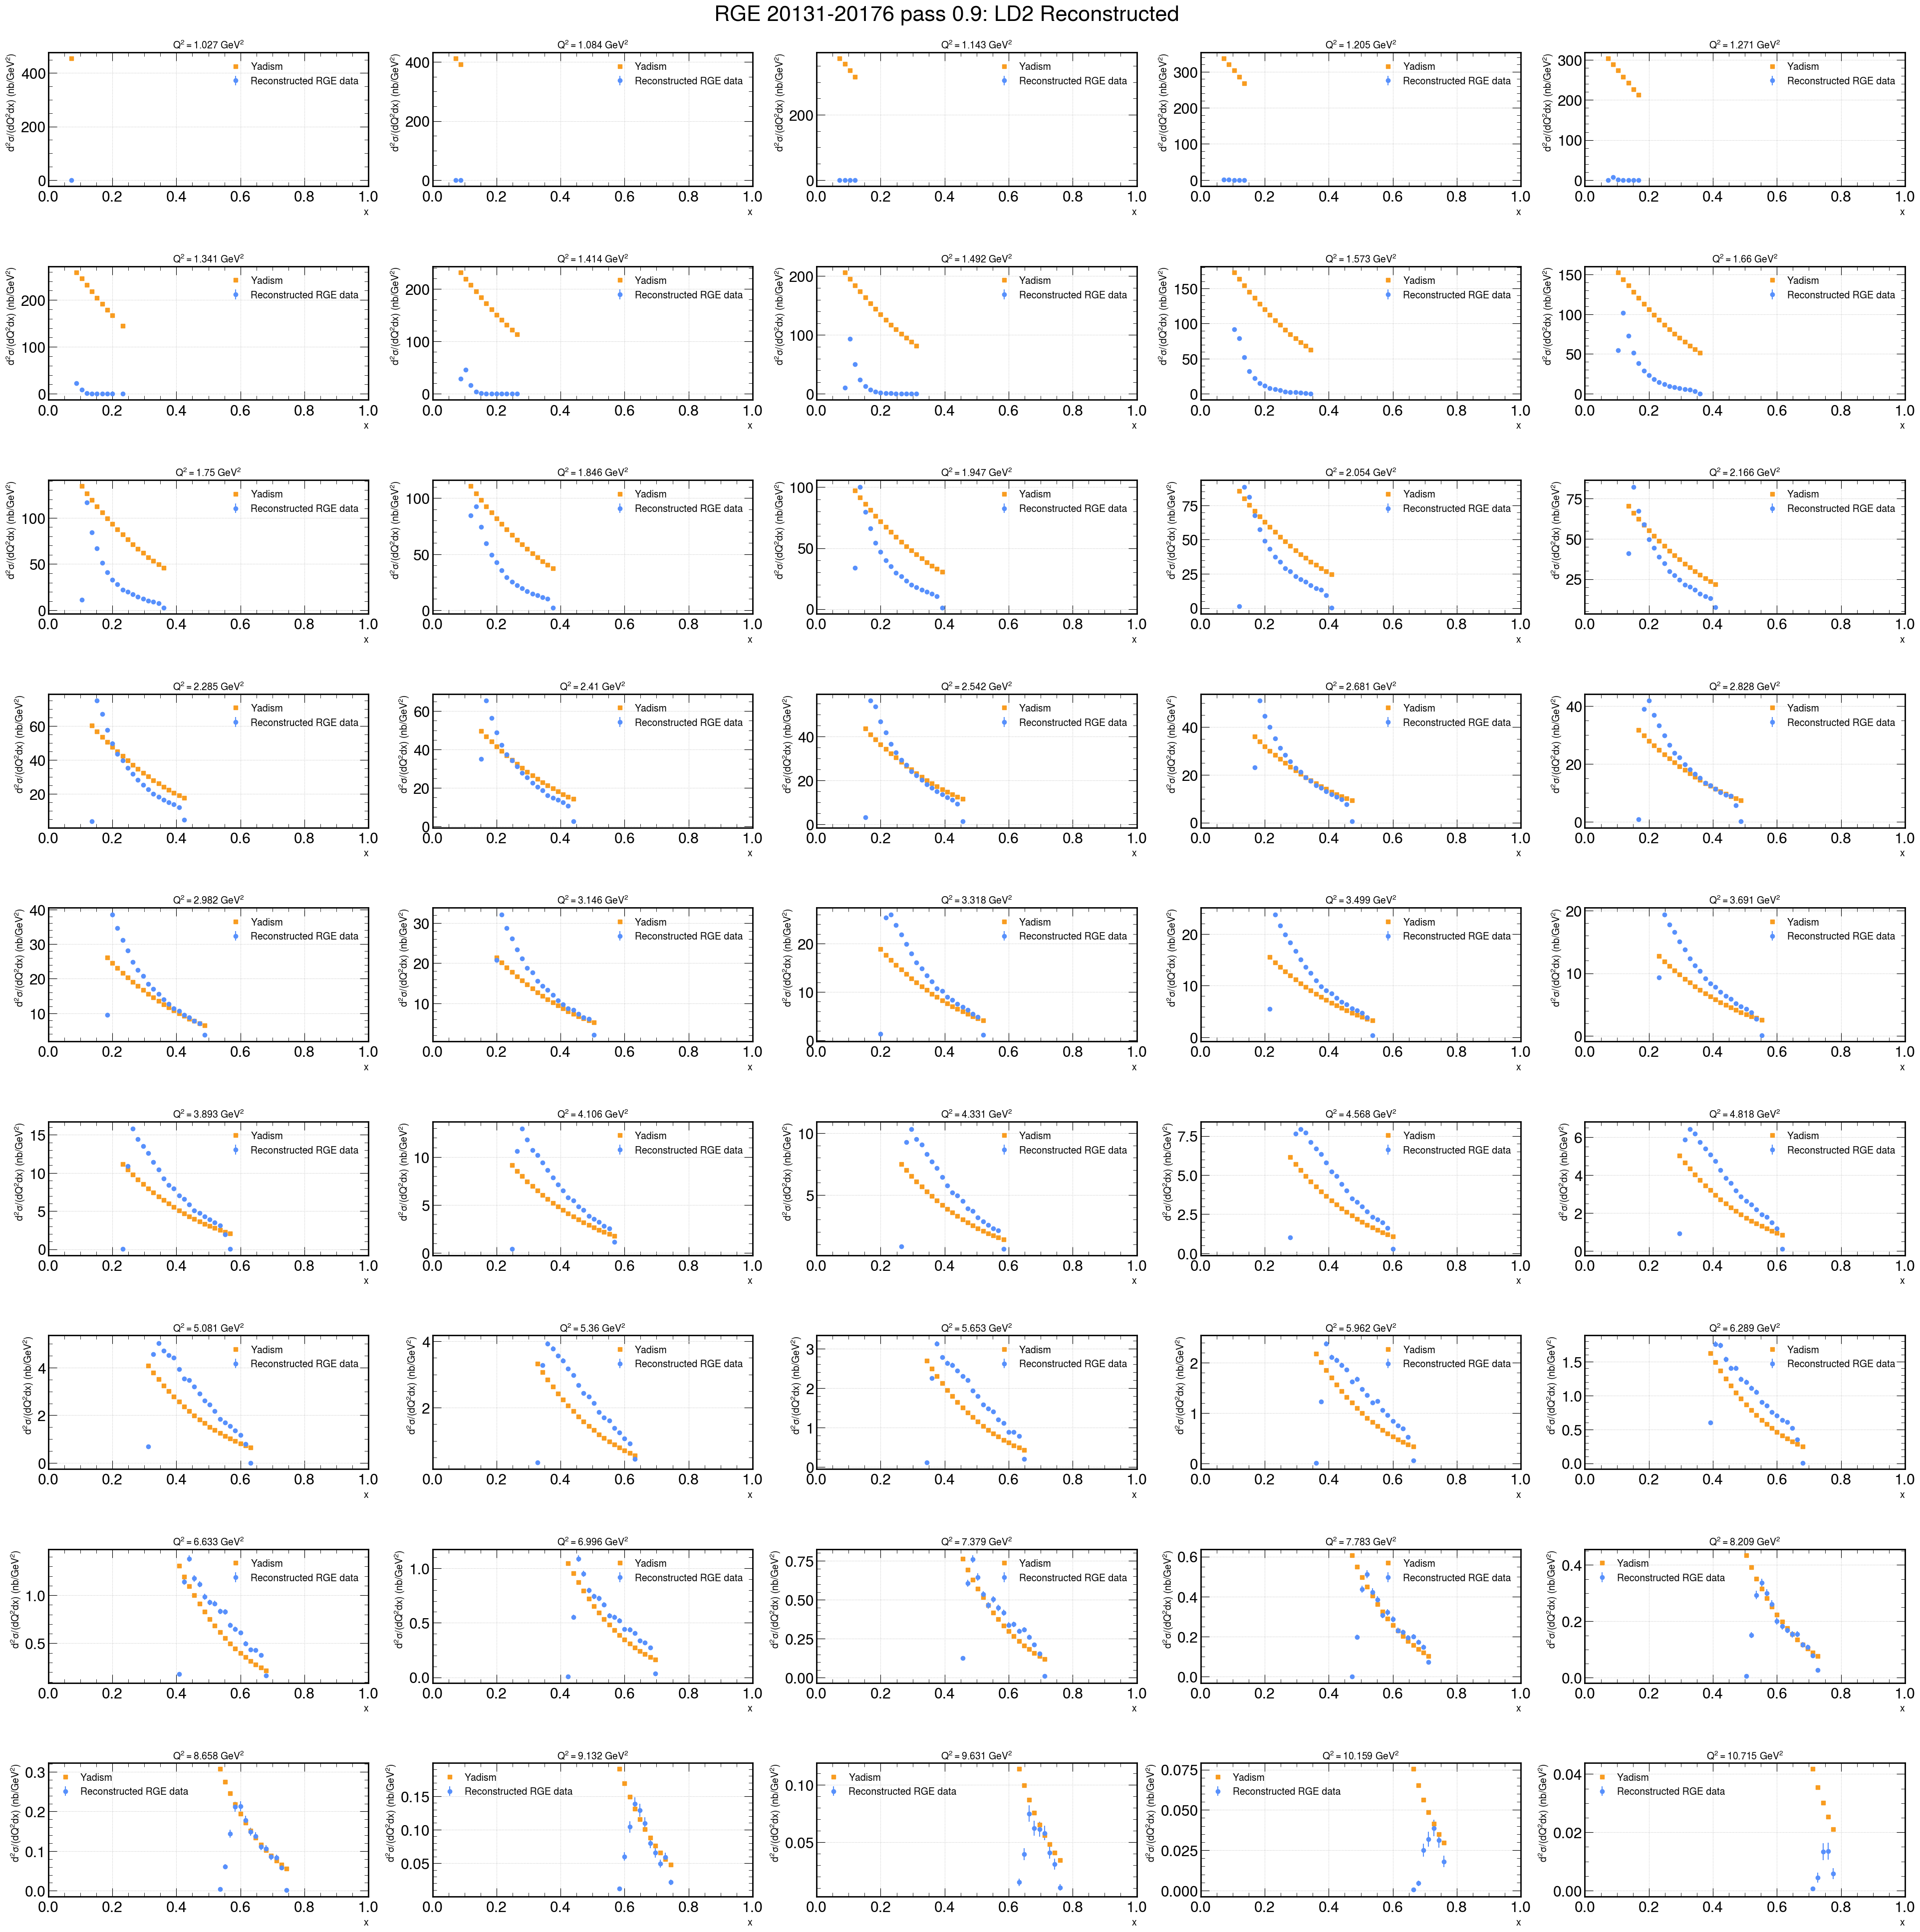

In [10]:
fig, axs = plt.subplots(figsize = (48,48), ncols = 5, nrows=9)
fig.subplots_adjust(hspace=0.6)
axs = axs.flatten()
for i, Q2_bin_center in enumerate(all_Q2_bin_centers):
    df_in_bin = reco_RGE_deuterium_df.query("Q2 == @Q2_bin_center")
    x_values = df_in_bin["x"]
    absolute_cross_section, absolute_cross_section_errors = df_in_bin["absolute_cross_sections"], df_in_bin["absolute_cross_sections_errors"]
    yadism_cross_section, yadism_cross_section_errors = df_in_bin["sigma_yadism_pb_per_GeV2"], df_in_bin["sigma_yadism_pdf_err68"]
    axs[i].errorbar(x_values, absolute_cross_section/1000, yerr = absolute_cross_section_errors/1000, label="Reconstructed RGE data", fmt="o")
    axs[i].plot(
        x_values,
        yadism_cross_section / 1000,
        "s",
        label="Yadism"
    )
    axs[i].fill_between(
        x_values,
        (yadism_cross_section - yadism_cross_section_errors) / 1000,
        (yadism_cross_section + yadism_cross_section_errors) / 1000,
        alpha=0.3
    )
    axs[i].set_xlim(0,1)
    axs[i].set_title(f"$Q^2 = {round(Q2_bin_center, 3)} ~GeV^2$", fontsize=14)
    axs[i].set_xlabel("x", fontsize=14)
    axs[i].set_ylabel("$d^2 \\sigma / (dQ^2 dx)~ (nb/GeV^2)$", fontsize=14)
    axs[i].legend(fontsize=14)
    axs[i].grid()
plt.suptitle("RGE 20131-20176 pass 0.9: LD2 Reconstructed", y=.9)